# Vehicle Insurance Cost Estimation with Machine Learning
- dataset link: https://www.kaggle.com/datasets/govindaramsriram/car-insurance-premium-dataset/data

## Importing Libraries

In [69]:
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.ensemble import RandomForestRegressor
!pip install xgboost
import xgboost as xg
from xgboost import XGBRegressor

## Load Dataset

In [23]:
train_df=pd.read_csv("car_insurance_premium_dataset.csv")
test_df=pd.read_csv("car_insurance_premium_dataset_TEST.csv")

train_df

,Driver Age,Driver Experience,Previous Accidents,Annual Mileage (x1000 km),Car Manufacturing Year,Car Age,Insurance Premium ($)
0,56,32,4,17,2002,23,488.35
1,46,19,0,21,2025,0,486.15
2,32,11,4,15,2020,5,497.55
3,60,0,4,19,1991,34,498.35
4,25,7,0,13,2005,20,495.55
...,...,...,...,...,...,...,...
995,23,5,3,22,2020,5,500.00
996,43,8,3,17,2023,2,494.55
997,21,3,5,19,1998,27,506.05
998,36,18,1,23,2011,14,491.45


## Preprocessing

In [24]:
print(train_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Driver Age                 1000 non-null   int64  
 1   Driver Experience          1000 non-null   int64  
 2   Previous Accidents         1000 non-null   int64  
 3   Annual Mileage (x1000 km)  1000 non-null   int64  
 4   Car Manufacturing Year     1000 non-null   int64  
 5   Car Age                    1000 non-null   int64  
 6   Insurance Premium ($)      1000 non-null   float64
dtypes: float64(1), int64(6)
memory usage: 54.8 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Driver Age                 100 non-null    int64  
 1   Driver Experience          100 non-null    int64  
 2   Pre

In [25]:
# we looked the others but we didnt write again.
train_df["Previous Accidents"].value_counts() 

Previous Accidents
3    185
4    176
1    171
5    170
0    154
2    144
Name: count, dtype: int64

In [26]:
train_df.corr()

,Driver Age,Driver Experience,Previous Accidents,Annual Mileage (x1000 km),Car Manufacturing Year,Car Age,Insurance Premium ($)
Driver Age,1.000000,0.607890,0.031819,0.056822,0.008187,-0.008187,-0.776848
Driver Experience,0.607890,1.000000,0.020837,-0.014424,-0.038194,0.038194,-0.803323
Previous Accidents,0.031819,0.020837,1.000000,0.007088,-0.030123,0.030123,0.410786
Annual Mileage (x1000 km),0.056822,-0.014424,0.007088,1.000000,-0.002898,0.002898,0.022131
Car Manufacturing Year,0.008187,-0.038194,-0.030123,-0.002898,1.000000,-1.000000,-0.171829
Car Age,-0.008187,0.038194,0.030123,0.002898,-1.000000,1.000000,0.171829
Insurance Premium ($),-0.776848,-0.803323,0.410786,0.022131,-0.171829,0.171829,1.000000


## Train-test-split

In [41]:
X_train=train_df.iloc[:, :-1]
X_test=test_df.iloc[:, :-1]
y_train=train_df.iloc[:, -1]
y_test=test_df.iloc[:, -1]


## Standardization

In [42]:
X_train

,Driver Age,Driver Experience,Previous Accidents,Annual Mileage (x1000 km),Car Manufacturing Year,Car Age
0,56,32,4,17,2002,23
1,46,19,0,21,2025,0
2,32,11,4,15,2020,5
3,60,0,4,19,1991,34
4,25,7,0,13,2005,20
...,...,...,...,...,...,...
995,23,5,3,22,2020,5
996,43,8,3,17,2023,2
997,21,3,5,19,1998,27
998,36,18,1,23,2011,14


In [43]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
X_train

array([[ 1.04842048,  1.63592078,  0.84331996, -0.21163858, -0.54420925,
         0.54420925],
       [ 0.32161252,  0.40240937, -1.51232238,  0.69570795,  1.6762649 ,
        -1.6762649 ],
       [-0.69591862, -0.35667457,  0.84331996, -0.66531184,  1.19355313,
        -1.19355313],
       ...,
       [-1.49540738, -1.11575851,  1.43223054,  0.24203469, -0.93037867,
         0.93037867],
       [-0.40519544,  0.30752388, -0.9234118 ,  1.14938122,  0.32467194,
        -0.32467194],
       [-0.33251464,  0.40240937, -0.33450121, -1.34582174, -0.54420925,
         0.54420925]])

## Model create : RANDOM FOREST REGRESSOR

In [46]:
rfr=RandomForestRegressor(n_estimators=50,random_state=42)
model=rfr.fit(X_train,y_train)

## Model Performance Evaluation : RANDOM FOREST REGRESSOR

In [52]:
y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MSE: 0.7140707699999862
MAE: 0.6563099999999997
R2 Score: 0.978239019702219


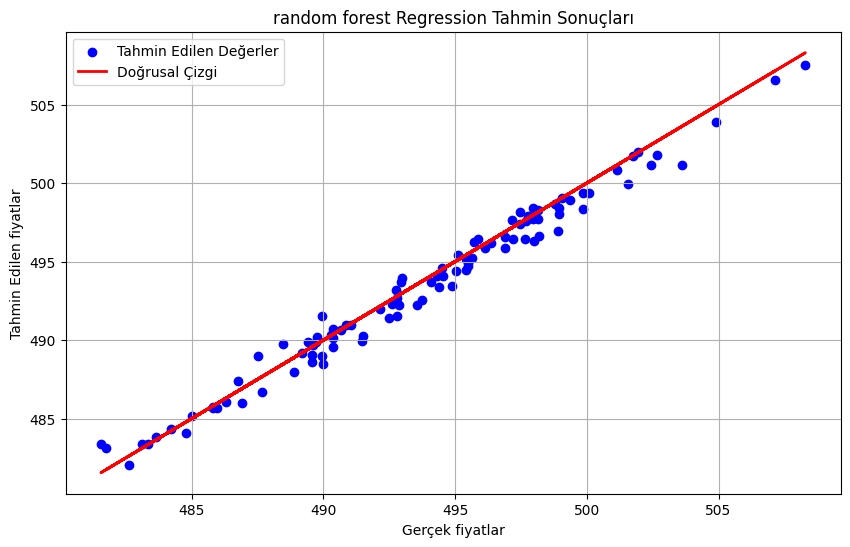

In [48]:
# Tahmin yap
y_pred = model.predict(X_test)

# Görselleştirme
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Tahmin Edilen Değerler')  # Gerçek vs Tahmin
plt.plot(y_test, y_test, color='red', linewidth=2, label='Doğrusal Çizgi')  # Mükemmel Doğrusal Çizgi
plt.xlabel('Gerçek fiyatlar')
plt.ylabel('Tahmin Edilen fiyatlar')
plt.title('random forest Regression Tahmin Sonuçları')
plt.legend()
plt.grid(True)
plt.show()

## Prediction :: RANDOM FOREST REGRESSOR

In [65]:
example=[[22,2,0,10,2021,4]]
example=scaler.fit_transform(example)
y_pred2 = model.predict(example)
y_pred2

array([494.349])

## Model Create : XGBOOST REGRESSOR

In [70]:
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

## Model Performance Evaluation : XGBOOST REGRESSOR

In [71]:
y_pred_xgb = xgb_model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred_xgb))
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("R2 Score:", r2_score(y_test, y_pred_xgb))

MSE: 0.3571815154544997
MAE: 0.4492230224609375
R2 Score: 0.9891150565923079


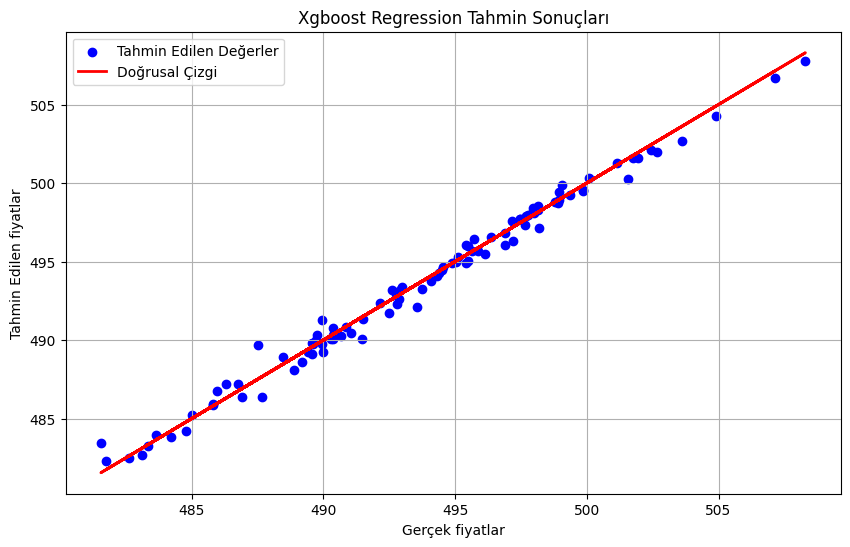

In [72]:
# Tahmin yap
y_pred_xgb = xgb_model.predict(X_test)

# Görselleştirme
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, color='blue', label='Tahmin Edilen Değerler')  # Gerçek vs Tahmin
plt.plot(y_test, y_test, color='red', linewidth=2, label='Doğrusal Çizgi')  # Mükemmel Doğrusal Çizgi
plt.xlabel('Gerçek fiyatlar')
plt.ylabel('Tahmin Edilen fiyatlar')
plt.title('Xgboost Regression Tahmin Sonuçları')
plt.legend()
plt.grid(True)
plt.show()

## Prediction : XGBOOST REGRESSOR

In [74]:
example=[[22,2,0,10,2021,4]]
example=scaler.fit_transform(example)
y_pred_xgb = xgb_model.predict(example)
y_pred_xgb

array([492.55634], dtype=float32)

## Compare both model

In [73]:
rf_pred = rfr.predict(X_test)  # Random Forest tahmini
xgb_pred = xgb_model.predict(X_test)  # XGBoost tahmini

print("Random Forest R2 Score:", r2_score(y_test, rf_pred))
print("XGBoost R2 Score:", r2_score(y_test, xgb_pred))

Random Forest R2 Score: 0.978239019702219
XGBoost R2 Score: 0.9891150565923079
